Enter the Strike Price (K): 100
Enter the Premium (P): 45


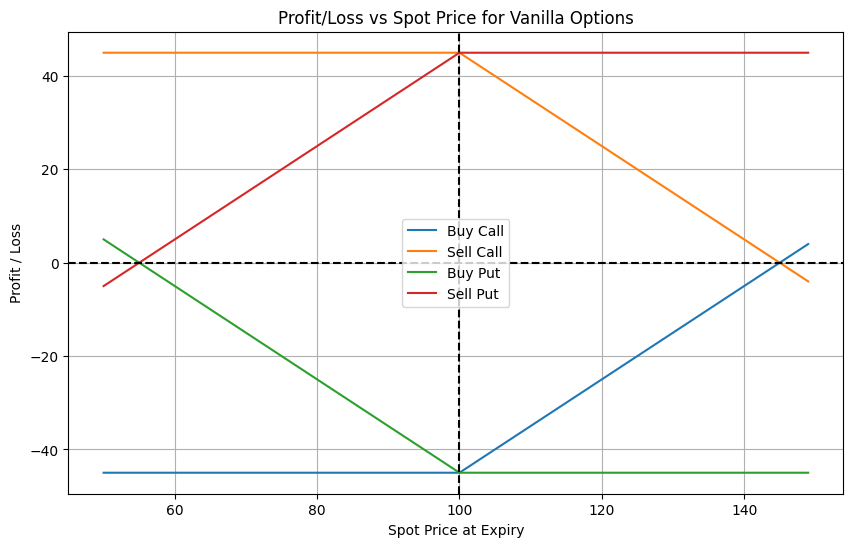

'\nWe ask the user for the two most important option parameters:\nK -> Strike price (the price at which the option activates)\nP -> Premium (the cost paid upfront for buying the option)\nWe create a range of possible spot prices at expiry.\nInstead of checking just one value, we look at a whole spectrum\naround the strike price to clearly see profit/loss behavior.\nNumPy\'s maximum() is perfect here because option payoffs are piecewise.\nIt automatically handles the "either zero or something positive" logic\nwithout us writing if-else conditions.\n    For a call buyer:\n    - Profit starts only after S > K\n    - Premium is always a cost, so we subtract it\n    Call seller is exactly the opposite of the buyer:\n    - Gains premium upfront\n    - Suffers loss if buyer makes money\n      Put buyer benefits when the market falls below the strike price\n    Again, premium is a fixed cost regardless of outcome\n        Put seller earns the premium\n    but loses money if the price drops too

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# INPUTS :-
K = float(input("Enter the Strike Price (K): "))
P = float(input("Enter the Premium (P): "))

# Spot price range :-
S = np.arange(K - 50, K + 50, 1)

#PAYOFF FUNCTIONS USING MAXIMUM FUNCTION GIVEN BY NUMPY :-
def buy_call(S, K, P):
    return np.maximum(0, S - K) - P

def sell_call(S, K, P):
    return P - np.maximum(0, S - K)

def buy_put(S, K, P):
    return np.maximum(0, K - S) - P

def sell_put(S, K, P):
    return P - np.maximum(0, K - S)

# CALCULATIONS :-
bc = buy_call(S, K, P)
sc = sell_call(S, K, P)
bp = buy_put(S, K, P)
sp = sell_put(S, K, P)

#PLOTTING :-
plt.figure(figsize=(10, 6))

plt.plot(S, bc, label="Buy Call")
plt.plot(S, sc, label="Sell Call")
plt.plot(S, bp, label="Buy Put")
plt.plot(S, sp, label="Sell Put")

plt.axhline(0, color='black', linestyle='--')
plt.axvline(K, color='black', linestyle='--')

plt.xlabel("Spot Price at Expiry")
plt.ylabel("Profit / Loss")
plt.title("Profit/Loss vs Spot Price for Vanilla Options")
plt.legend()
plt.grid(True)

plt.show()

# EXPLAINATION
"""
We ask the user for the two most important option parameters:
K -> Strike price (the price at which the option activates)
P -> Premium (the cost paid upfront for buying the option)
We create a range of possible spot prices at expiry.
Instead of checking just one value, we look at a whole spectrum
around the strike price to clearly see profit/loss behavior.
NumPy's maximum() is perfect here because option payoffs are piecewise.
It automatically handles the "either zero or something positive" logic
without us writing if-else conditions.
    For a call buyer:
    - Profit starts only after S > K
    - Premium is always a cost, so we subtract it
    Call seller is exactly the opposite of the buyer:
    - Gains premium upfront
    - Suffers loss if buyer makes money
      Put buyer benefits when the market falls below the strike price
    Again, premium is a fixed cost regardless of outcome
        Put seller earns the premium
    but loses money if the price drops too much
  All this is seen in the graph where positive value shows profit and negative values show loss
"""
